## Assignment 3, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections
from pprint import pprint
import random

In [2]:
# Read the edge list from the file 
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)
facebook_num_nodes = facebook_G.number_of_nodes()
print(f'Number of nodes in Facebook Network: {facebook_num_nodes}')

Number of nodes in Facebook Network: 133


## (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of ¯k and p. Please plot the graph structures, degree distributions, and clustering coefficients as well.


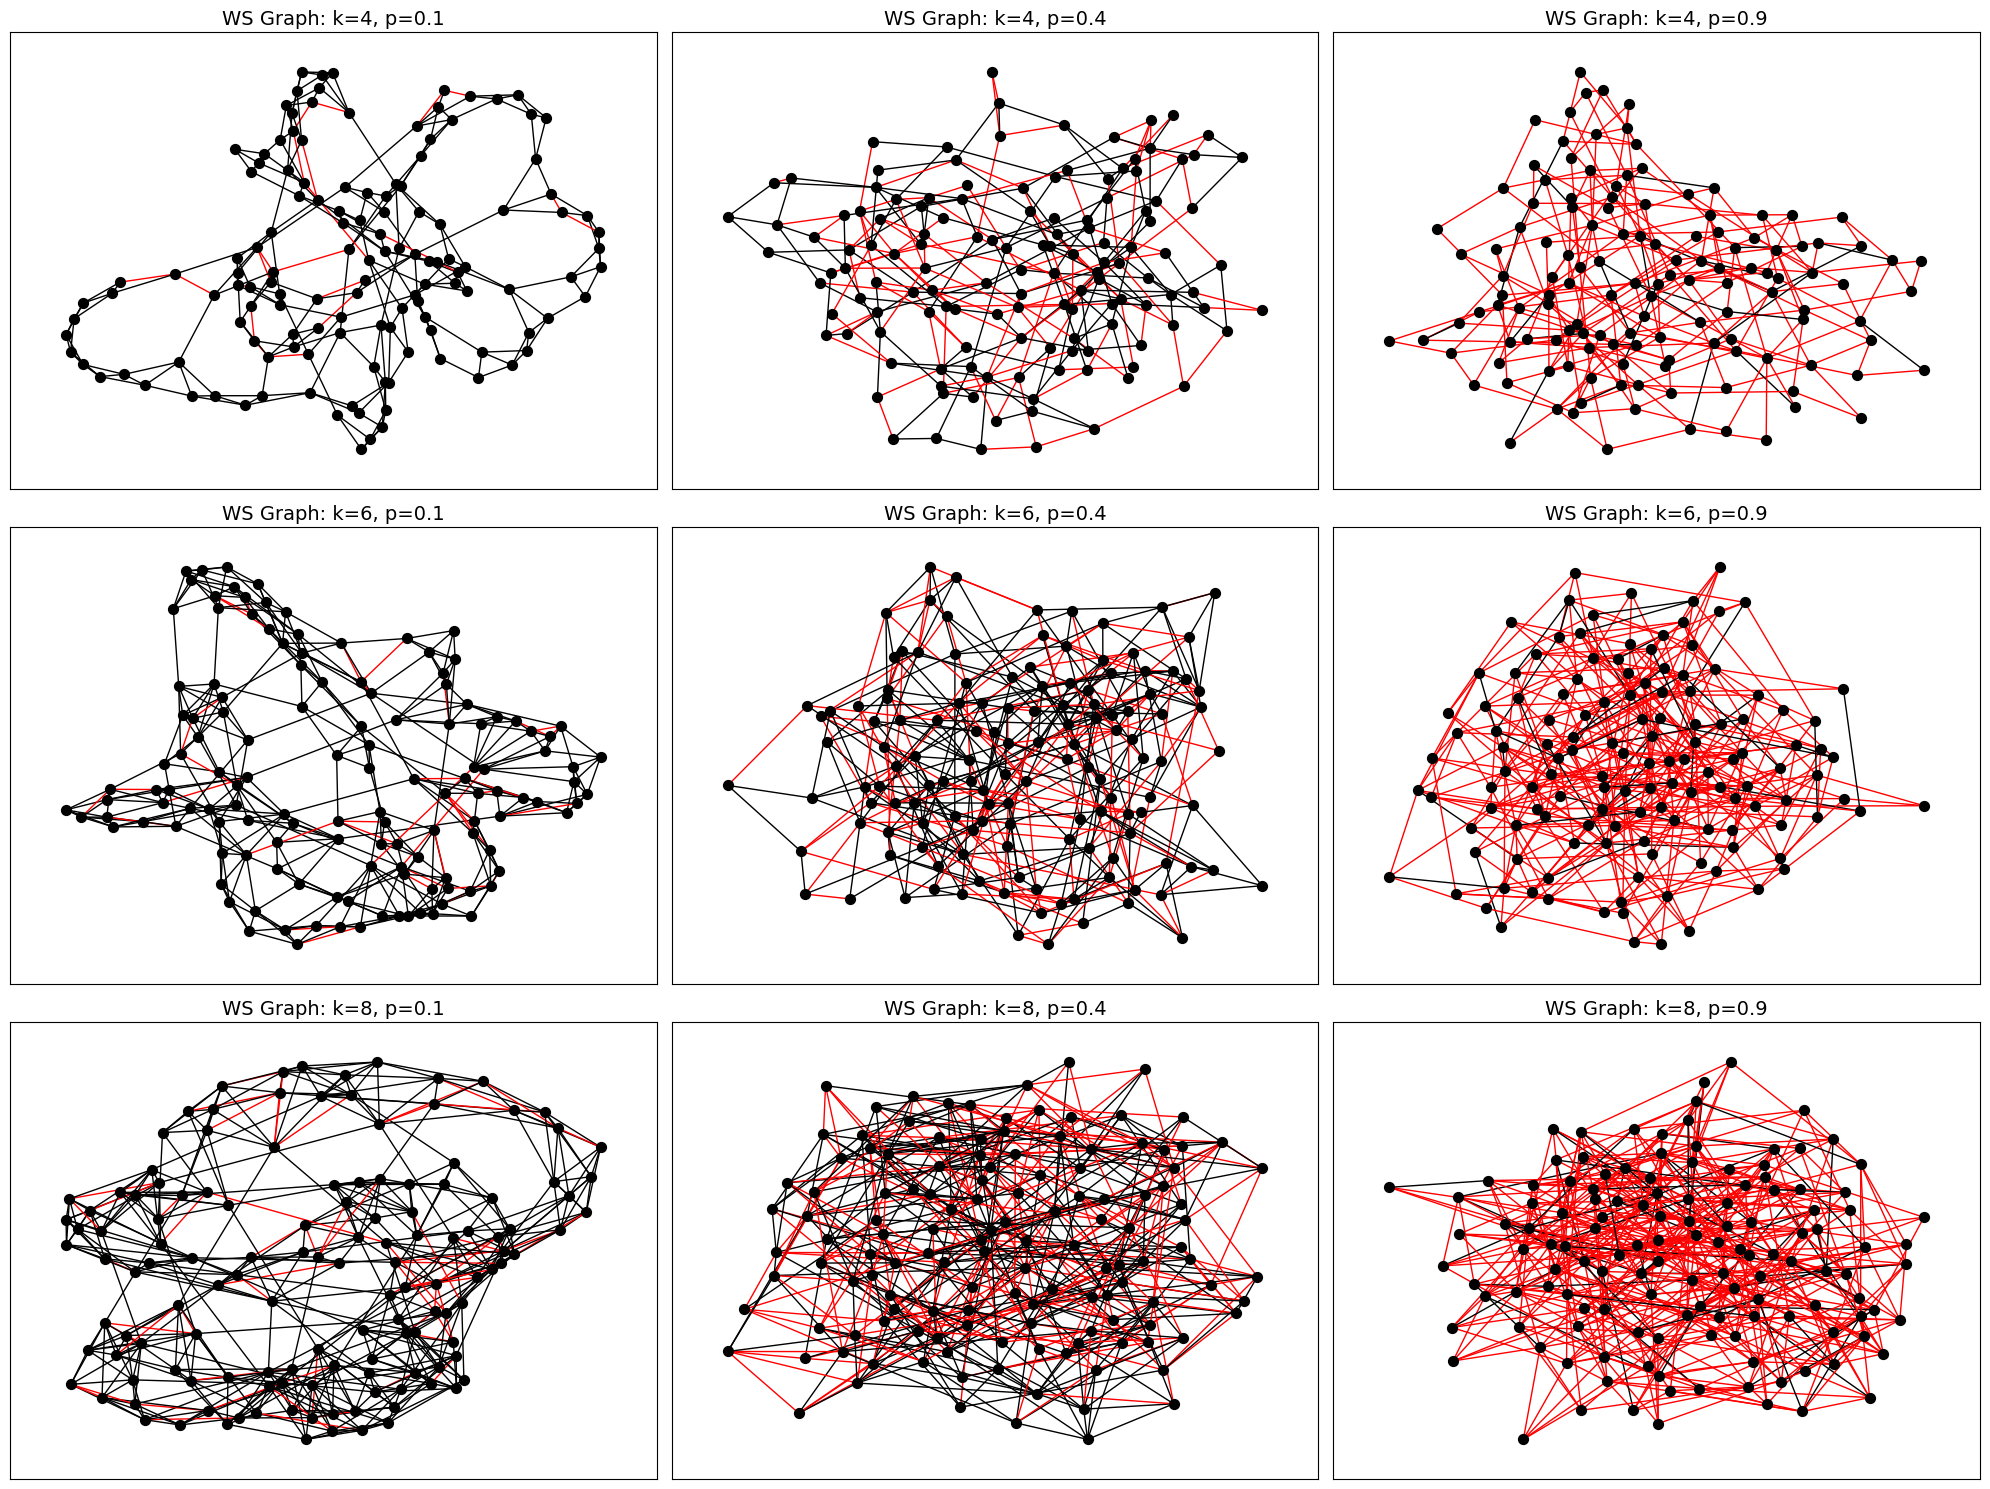

In [36]:
k_values = [4, 6, 8]  # Average degrees
p_values = [0.1, 0.4, 0.9]  # Rewiring probabilities

fig_graphs, axs_graphs = plt.subplots(len(k_values), len(p_values), figsize=(20, 15))

clustering_coefficients = []
degree_distributions = []

# Iterate over each combination of k and p values to generate graphs
for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        # Generate Watts-Strogatz graph
        G = nx.watts_strogatz_graph(facebook_num_nodes, k, p)
        
        # Calculate positions
        pos = nx.spring_layout(G)  # Use spring layout for better visualization
        
        # Determine edge colors based on rewiring probability
        edge_colors = ['red' if random.random() < p else 'black' for _ in G.edges()]
        
        # Plot the graph structure
        axs_graphs[i, j].set_title(f'WS Graph: k={k}, p={p}', fontsize=14)
        nx.draw_networkx(G, pos, node_size=50, ax=axs_graphs[i, j], with_labels=False, 
                         edge_color=edge_colors, node_color='black')  
        
        axs_graphs[i, j].set_xticks([])
        axs_graphs[i, j].set_yticks([])

        # Calculate clustering coefficient and store it
        clustering_coeff = nx.average_clustering(G)
        clustering_coefficients.append((k, p, clustering_coeff))

        # Calculate degree distribution and store it
        degrees = [G.degree(n) for n in G.nodes()]
        degree_distribution, bins = np.histogram(degrees, bins=np.arange(0, max(degrees) + 2))  # Create integer bins
        degree_distributions.append((k, p, bins[:-1], degree_distribution))

plt.tight_layout()
plt.show()


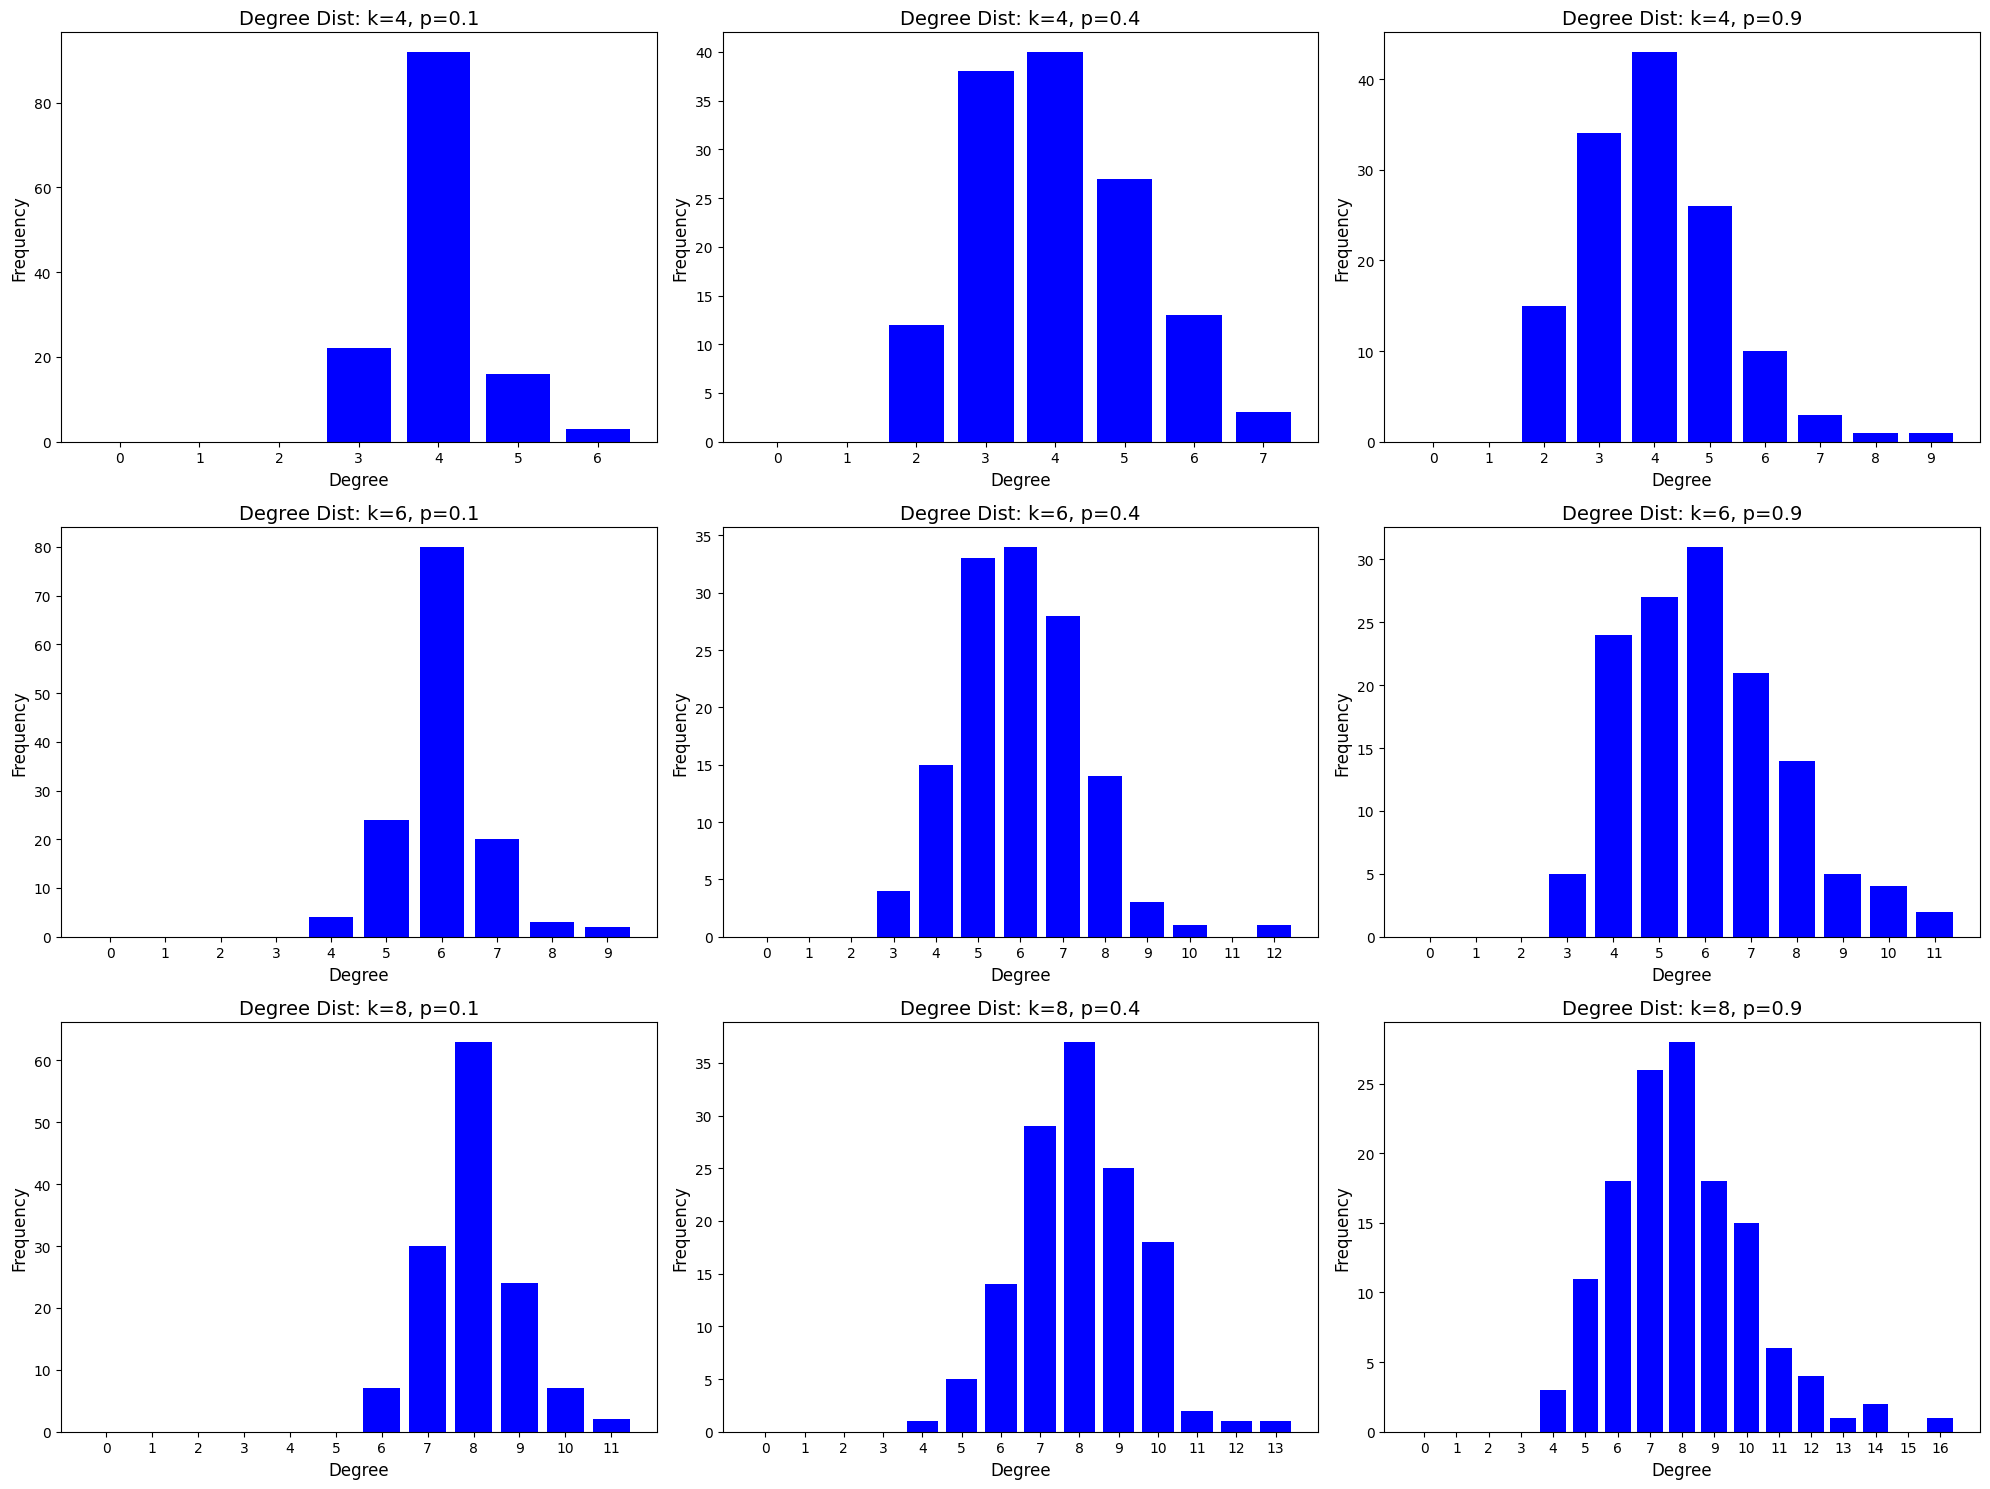

In [37]:
# Plotting Degree Distributions
fig_degree, axs_degree = plt.subplots(len(k_values), len(p_values), figsize=(20, 15))

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        # Get degree distribution for current (k, p)
        bins, distribution = [(d[2], d[3]) for d in degree_distributions if d[0] == k and d[1] == p][0]
        
        # Plot the degree distribution
        axs_degree[i, j].bar(bins, distribution, width=0.8, color='blue')
        axs_degree[i, j].set_title(f'Degree Dist: k={k}, p={p}', fontsize=14)
        axs_degree[i, j].set_xlabel('Degree', fontsize=12)
        axs_degree[i, j].set_ylabel('Frequency', fontsize=12)

        # Set x-ticks to show all degrees
        axs_degree[i, j].set_xticks(bins)  # Set ticks to be all bin centers
        axs_degree[i, j].set_xticklabels(bins)  # Set labels to be the same as tick positions

plt.tight_layout()
plt.show()

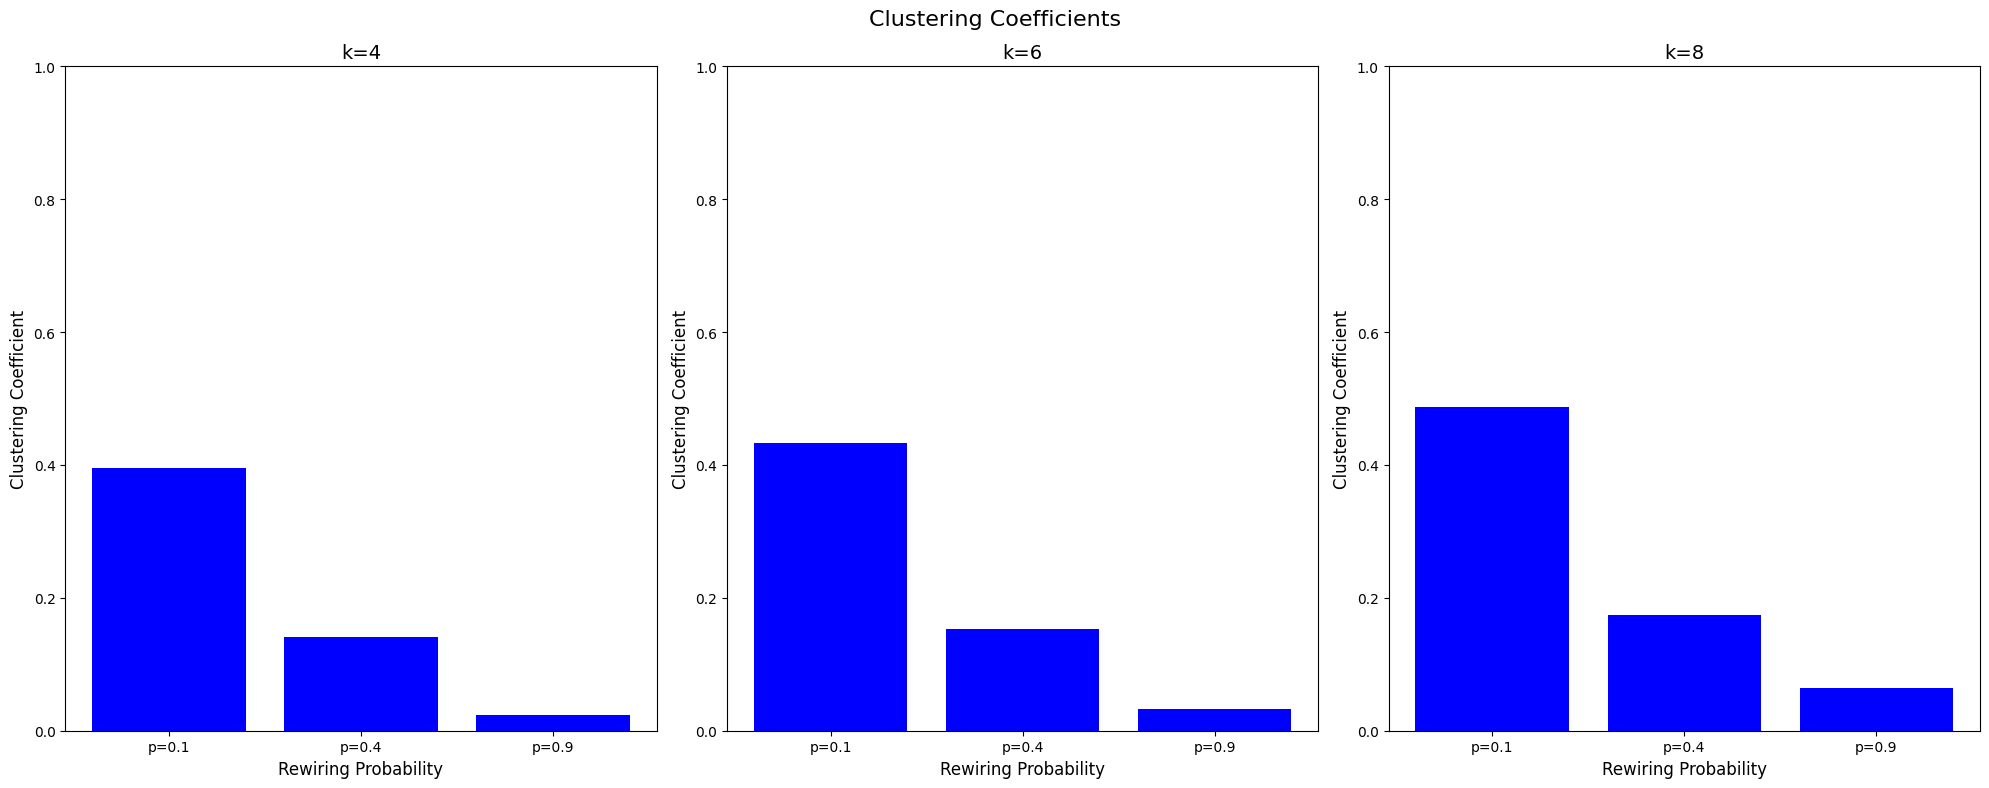

In [38]:
# Plotting Clustering Coefficients
fig_clustering, axs_clustering = plt.subplots(1, len(k_values), figsize=(20, 8))  # 1 row, len(k_values) columns
fig_clustering.suptitle('Clustering Coefficients', fontsize=16)

for i, k in enumerate(k_values):
    # Get clustering coefficients for the current k across all p values
    coeffs = [c[2] for c in clustering_coefficients if c[0] == k]
    
    # Bar plot for current k
    axs_clustering[i].bar([f'p={p}' for p in p_values], coeffs, color='blue')
    axs_clustering[i].set_ylim(0, 1)
    axs_clustering[i].set_title(f'k={k}', fontsize=14)
    axs_clustering[i].set_xlabel('Rewiring Probability', fontsize=12)
    axs_clustering[i].set_ylabel('Clustering Coefficient', fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
clustering_coefficients

[(4, 0.1, 0.35037593984962395),
 (4, 0.4, 0.09774436090225562),
 (4, 0.9, 0.03452679317340971),
 (6, 0.1, 0.4231829573934839),
 (6, 0.4, 0.18597087957990205),
 (6, 0.9, 0.04625687595612406),
 (8, 0.1, 0.44505961874382927),
 (8, 0.4, 0.18455804846782278),
 (8, 0.9, 0.05522568492493301)]

## (b) Generate scale-free graphs, and each of them should have the same number of nodes as FacebookEgo. Please generate 3 graphs with three different values of γ. Please plot the graph structures, degree distributions, and clustering coefficients as well.


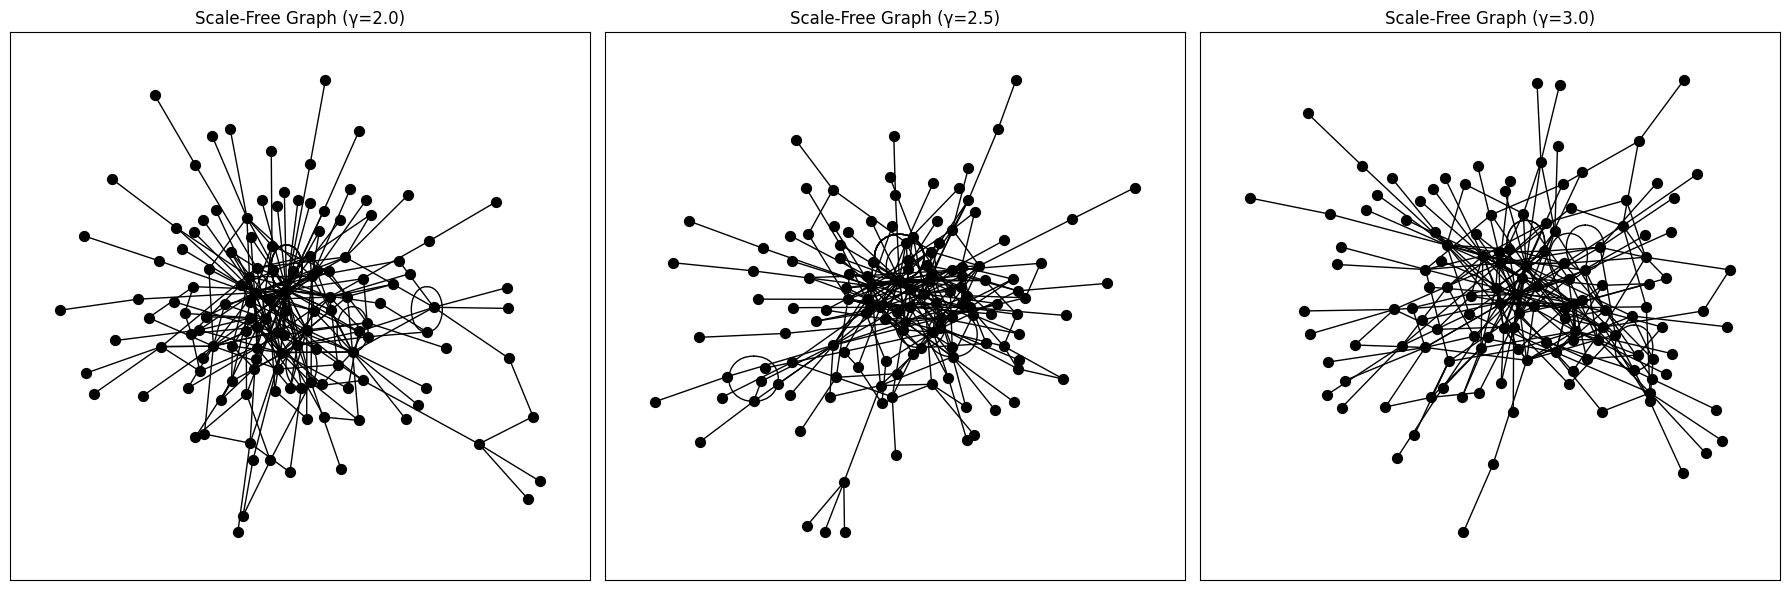

In [27]:
gamma_values = [2.0, 2.5, 3.0]  # Three different values of gamma

# Prepare a single row of 3 subplots for the graph structures
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Generate and plot graphs for each gamma
for i, gamma in enumerate(gamma_values):
    # Generate scale-free graph
    G = nx.scale_free_graph(facebook_num_nodes, delta_in=gamma, delta_out=gamma, seed=42)
    
    # Convert to undirected for visual purposes
    G = G.to_undirected()

    # Calculate positions for plotting
    pos = nx.spring_layout(G, seed=42)

    # Plot the graph structure
    axs[i].set_title(f'Scale-Free Graph (γ={gamma})')
    nx.draw_networkx(G, pos, node_size=50, ax=axs[i], with_labels=False, node_color='black')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## (c) Generate graphs based on Barab´asi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well.


## (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?
